# 第2章原始程式碼

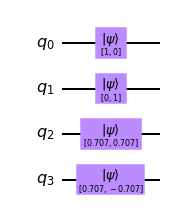

In [1]:
#Program 2.1 Initialize qubit state
from qiskit import QuantumCircuit
import math
qc = QuantumCircuit(4)
qc.initialize([1,0],0)
qc.initialize([0,1],1)
qc.initialize([1/math.sqrt(2), 1/math.sqrt(2)],2)
qc.initialize([1/math.sqrt(2), -1/math.sqrt(2)],3)
qc.draw('mpl')

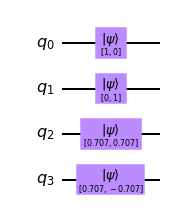

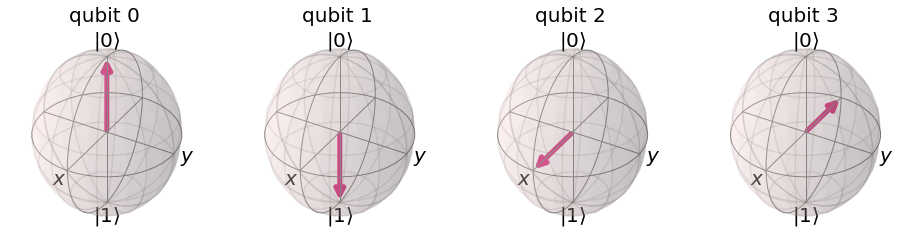

In [2]:
#Program 2.2 Initialize qubit state and show Bloch sphere
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
import math
qc = QuantumCircuit(4)
qc.initialize([1,0],0)
qc.initialize([0,1],1)
qc.initialize([1/math.sqrt(2), 1/math.sqrt(2)],2)
qc.initialize([1/math.sqrt(2), -1/math.sqrt(2)],3)
state = Statevector.from_instruction(qc)
display(qc.draw('mpl'))
display(state.draw('bloch'))

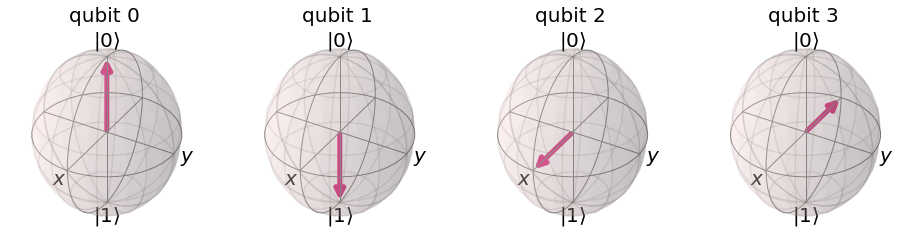

In [3]:
#Program 2.3 Show Bloch sphere
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

     ┌─────────────────┐┌─┐         
q_0: ┤ Initialize(1,0) ├┤M├─────────
     ├─────────────────┤└╥┘┌─┐      
q_1: ┤ Initialize(1,0) ├─╫─┤M├──────
     ├─────────────────┤ ║ └╥┘┌─┐   
q_2: ┤ Initialize(0,1) ├─╫──╫─┤M├───
     ├─────────────────┤ ║  ║ └╥┘┌─┐
q_3: ┤ Initialize(0,1) ├─╫──╫──╫─┤M├
     └─────────────────┘ ║  ║  ║ └╥┘
c: 4/════════════════════╩══╩══╩══╩═
                         0  1  2  3 
Counts: {'1100': 1000}


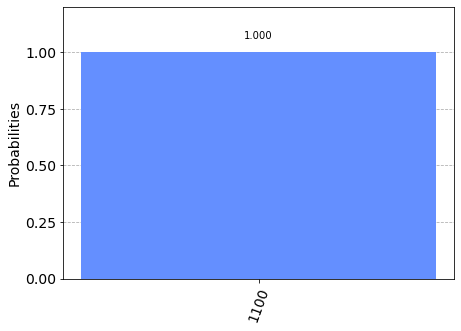

In [4]:
#Program 2.4 Measure qubit state
from qiskit import QuantumCircuit,execute
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram
qc = QuantumCircuit(4,4)
qc.initialize([1,0],0)
qc.initialize([1,0],1)
qc.initialize([0,1],2)
qc.initialize([0,1],3)
qc.measure([0,1,2,3],[0,1,2,3])
print(qc)
sim=AerSimulator()
job=execute(qc, backend=sim, shots=1000)
result=job.result()
counts=result.get_counts(qc)
print("Counts:",counts)
plot_histogram(counts)

      ┌─────────────────────────────┐ ┌─┐         
q_0: ─┤ Initialize(0.70711,0.70711) ├─┤M├─────────
      ├─────────────────────────────┴┐└╥┘┌─┐      
q_1: ─┤ Initialize(0.70711,-0.70711) ├─╫─┤M├──────
      ├──────────────────────────────┤ ║ └╥┘┌─┐   
q_2: ─┤ Initialize(0.70711,0.70711j) ├─╫──╫─┤M├───
     ┌┴──────────────────────────────┤ ║  ║ └╥┘┌─┐
q_3: ┤ Initialize(0.70711,-0.70711j) ├─╫──╫──╫─┤M├
     └───────────────────────────────┘ ║  ║  ║ └╥┘
c: 4/══════════════════════════════════╩══╩══╩══╩═
                                       0  1  2  3 
Counts: {'1100': 59, '0111': 60, '1011': 51, '1110': 46, '0101': 62, '1101': 74, '0000': 76, '1010': 55, '0011': 71, '1111': 66, '0100': 55, '0110': 71, '1001': 59, '0001': 57, '0010': 74, '1000': 64}


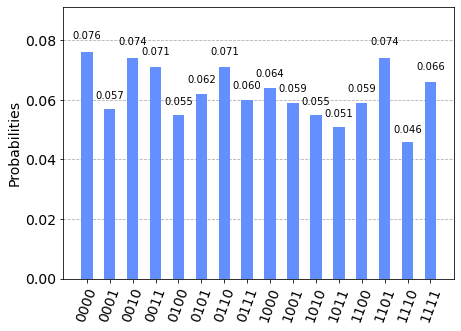

In [5]:
#Program 2.5 Measure qubit state again
from qiskit import QuantumCircuit,execute
from qiskit.providers.aer import AerSimulator
from qiskit.visualization import plot_histogram
import math
qc = QuantumCircuit(4,4)
qc.initialize([1/math.sqrt(2), 1/math.sqrt(2)],0)
qc.initialize([1/math.sqrt(2), -1/math.sqrt(2)],1)
qc.initialize([1/math.sqrt(2), 1j/math.sqrt(2)],2)
qc.initialize([1/math.sqrt(2), -1j/math.sqrt(2)],3)
qc.measure([0,1,2,3],[0,1,2,3])
print(qc)
sim=AerSimulator()
job=execute(qc, backend=sim, shots=1000)
result=job.result()
counts=result.get_counts(qc)
print("Counts:",counts)
plot_histogram(counts)